In [1]:
import pandas as pd
import csv
import gensim
import numpy as np
import nltk
from nltk.tokenize import RegexpTokenizer
from scipy import spatial
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from collections import Counter
# Download these lists
# nltk.download('punkt')
# nltk.download('stopwords')

In [2]:
# Import all the datasets first
# Movie Titles Metadata.txt
mtm = 'cornell movie-dialogs corpus/movie_titles_metadata.txt'
# CSV for transforming the data
mtm_csv = 'mtm_csv.csv'

In [3]:
# Add header rows
with open(mtm_csv, 'wt') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames = ["Movie_Number", "Movie_Name", "Year_of_Release", 
                                                   "IMDB_Rating", "Number_of_Votes", "Genres"])
    writer.writeheader()

In [4]:
# Open the .txt file and write it onto the dataframe
with open(mtm, 'r', encoding = 'latin-1') as mtmeta:
    for lines in mtmeta:
        text = str(lines)
        line_list = text.split('+++$+++')
        
        with open(mtm_csv, 'a') as write_csv:
            writer = csv.writer(write_csv)
            writer.writerow([line_list[0].strip(), line_list[1].strip(), line_list[2].strip(),
                            line_list[3].strip(), line_list[4].strip(), line_list[5].strip()])

In [5]:
# Check the content of the csv file
mtm_df = pd.read_csv(mtm_csv, index_col = False, encoding='latin-1')
print(mtm_df.shape)
mtm_df.head(5)

(617, 6)


,Movie_Number,Movie_Name,Year_of_Release,IMDB_Rating,Number_of_Votes,Genres
0,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']"
1,m1,1492: conquest of paradise,1992,6.2,10421,"['adventure', 'biography', 'drama', 'history']"
2,m2,15 minutes,2001,6.1,25854,"['action', 'crime', 'drama', 'thriller']"
3,m3,2001: a space odyssey,1968,8.4,163227,"['adventure', 'mystery', 'sci-fi']"
4,m4,48 hrs.,1982,6.9,22289,"['action', 'comedy', 'crime', 'drama', 'thrill..."


In [6]:
mtm_df.Genres.describe()

count           617
unique          290
top       ['drama']
freq             34
Name: Genres, dtype: object

In [7]:
list1 = []
list1 = mtm_df.Genres.unique()
list1 = list1.tolist()

In [8]:
list2 = []
for j in list1:
    j=j.replace('[',"")
    j=j.replace(']',"")
    j=j.replace("'","")
    j=j.split(", ")
    for items in j:
        list2.append(items)

In [9]:
list2 = set(list2)
print(len(list2))

25


In [10]:
list2 = [w for w in list2 if not w in ['short', 'western', 'adult']]
print(len(list2))

22


In [11]:
list2

['',
 'comedy',
 'horror',
 'drama',
 'fantasy',
 'sci-fi',
 'family',
 'adventure',
 'thriller',
 'mystery',
 'biography',
 'film-noir',
 'history',
 'romance',
 'sport',
 'musical',
 'music',
 'crime',
 'documentary',
 'war',
 'action',
 'animation']

In [12]:
try:
    model = gensim.models.KeyedVectors.load_word2vec_format('../Google_Billion_Word_Corpus/GoogleNews-vectors-negative300.bin', binary=True)
except Exception as e:
    print(e)

In [13]:
# Dictionary for our genres
dict1 = {}
for i in list2:
    try:
        dict1[i] = model[i]
    except:
        pass

In [14]:
dict1

{'comedy': array([-2.95410156e-02, -5.83496094e-02, -2.13623047e-03,  3.47656250e-01,
        -2.56347656e-02, -9.13085938e-02, -9.66796875e-02,  7.76367188e-02,
         1.81640625e-01, -1.45263672e-02,  4.64843750e-01,  1.92382812e-01,
         9.70458984e-03,  2.63671875e-01, -9.27734375e-02,  1.36718750e-01,
        -1.63085938e-01,  1.80664062e-01, -2.42187500e-01, -2.98828125e-01,
        -7.56835938e-02,  9.17968750e-02,  2.81250000e-01, -6.39648438e-02,
        -5.49316406e-02,  1.14257812e-01,  2.81982422e-02,  2.65625000e-01,
         1.73828125e-01,  5.12695312e-02, -4.47265625e-01, -4.06250000e-01,
         2.49862671e-04,  5.68847656e-02, -2.78320312e-02, -1.75781250e-01,
         3.80859375e-01, -1.58203125e-01, -2.89916992e-04,  1.86523438e-01,
         3.17382812e-02, -2.16796875e-01,  3.51562500e-02,  1.44531250e-01,
        -3.76953125e-01,  1.27929688e-01, -1.01074219e-01,  1.56250000e-01,
         3.65234375e-01,  1.80664062e-01, -4.92187500e-01,  1.02539062e-01,
  

In [15]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [16]:
print("Does it include the stop words like \'a\', \'and\', \'the\'? %d %d %d" % ('a' in model.vocab, 'and' in model.vocab, 'the' in model.vocab))

Does it include the stop words like 'a', 'and', 'the'? 0 0 1


In [17]:
ml_df = pd.read_csv('ml_csv.csv', index_col = False, encoding='latin-1')

In [18]:
# Lets, import the dataframe
mc_df = pd.read_csv("mc_csv.csv", index_col = False, encoding='latin-1')

In [19]:
mcm_df = pd.read_csv("mcm_csv.csv", index_col = False, encoding='latin-1')

In [20]:
movie_check = 'm158'

In [21]:
# So, the columns here in this dataset mention that characterId1 
# is the charcter speking to characterId2 in each movies
mc1_df = mc_df.loc[mc_df['Movie_Number'] == movie_check]
ml1_df = ml_df.loc[ml_df['Movie_Number'] == movie_check]

In [22]:
mtm_df[mtm_df['Movie_Number'] == movie_check]

,Movie_Number,Movie_Name,Year_of_Release,IMDB_Rating,Number_of_Votes,Genres
158,m158,pet sematary,1989,6.3,19851,"['drama', 'fantasy', 'horror', 'mystery', 'thr..."


# For checking the genres of each movie dialogue with the entire genres in our dataset
 Using cosine similairties and word2vec model


In [23]:
tokenizer = RegexpTokenizer(r'\w+')

dict3 = {}
index1 = 0

# For a single dialogue
for index, rows in mc1_df.iterrows():
    s = rows[3]
    l = s.split('\'')[1::2]
    for _ in l:
        index1 += 1 
        val2 = {}
        av = np.zeros(300)
        line = ml1_df.loc[ml1_df['Line_Id'] == _, 'Dialogue'].iloc[0]
        print(line)
        line = tokenizer.tokenize(line)
        line = [i.lower() for i in line]
        line = [w for w in line if not w in stop_words]
        print(line)
        l1 = len(line)
        for tokens in line:
#             print(model[tokens])
            try:
                av += model[tokens]
            except:
                l1 -= 1
                pass
        av = av/l1
#         print(av)
        # Cosine similarities
        for key, vals in dict1.items():
            try:
                val2[key] = 1 - spatial.distance.cosine(av, vals)
            except:
                pass
        print(val2)
        m = max(val2, key = val2.get)
        print(m, val2[m])
        dict3[index1] = m

Who might you be, little Miss?
['might', 'little', 'miss']
{'comedy': 0.08513144624917146, 'horror': 0.11663842097580324, 'drama': 0.13282206315112288, 'fantasy': 0.23282045016096908, 'family': 0.16116786481668255, 'adventure': 0.16384722536170826, 'thriller': 0.0710317985956136, 'mystery': 0.1812417346440569, 'biography': 0.06165460325572991, 'history': 0.118216736874446, 'romance': 0.1260397355047711, 'sport': 0.15720804055641968, 'musical': 0.11179763776096718, 'music': 0.09233133484583245, 'crime': 0.04617367654322724, 'documentary': 0.021524770308517516, 'war': 0.061605056087916776, 'action': 0.12141097208244545, 'animation': 0.09768036078588094}
fantasy 0.23282045016096908
I'm Ellen Creed and I live at 642 Alden Lane, Dearborn, Michigan.  At least, I used to.
['ellen', 'creed', 'live', '642', 'alden', 'lane', 'dearborn', 'michigan', 'least', 'used']
{'comedy': 0.1177129041513213, 'horror': 0.1320037172286228, 'drama': 0.04508362158259882, 'fantasy': 0.18251198548011982, 'family':

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning:

invalid value encountered in true_divide




comedy nan
Good for you.
['good']
{'comedy': 0.08447773550178594, 'horror': 0.101691473955005, 'drama': 0.0572552279856402, 'fantasy': 0.14704125429686865, 'family': 0.08544211793775602, 'adventure': 0.07956643832912647, 'thriller': 0.0499132575792397, 'mystery': 0.06131622056465291, 'biography': 0.011032434796099944, 'history': 0.07155920352564848, 'romance': 0.05581935035306651, 'sport': 0.13443756692826758, 'musical': 0.07551593187021233, 'music': 0.08795480077541729, 'crime': 0.06570269368729875, 'documentary': 0.028875442582042776, 'war': 0.05861112199173857, 'action': 0.05572683472928042, 'animation': 0.010075225717730896}
fantasy 0.14704125429686865
God, that's fine.
['god', 'fine']
{'comedy': 0.08359201898372992, 'horror': 0.11179319108436414, 'drama': 0.08350330959994734, 'fantasy': 0.23805878667245572, 'family': 0.10133718775527245, 'adventure': 0.14120492588982703, 'thriller': 0.06012622936502221, 'mystery': 0.1149347276368089, 'biography': 0.1020319691943452, 'history': 0.

{'comedy': 0.10765646419626151, 'horror': 0.09149661371578177, 'drama': 0.07585312677583933, 'fantasy': 0.15171195094154488, 'family': 0.1283277060030601, 'adventure': 0.10591276807589767, 'thriller': 0.0986107625992656, 'mystery': 0.1378829505191259, 'biography': -0.0014383850051209457, 'history': 0.1633193827758459, 'romance': 0.10190163798856755, 'sport': 0.08518766617098616, 'musical': 0.04012773694599858, 'music': 0.10127089433949454, 'crime': 0.11388675411529314, 'documentary': -0.0032413904130654814, 'war': 0.13033310827424982, 'action': 0.1404672977376814, 'animation': 0.040578920411617925}
history 0.1633193827758459
Well, she was a little upset at first, and that's why I thought you ought to hold your peace when you talked to your people last night...you did, didn't you, Louis?
['well', 'little', 'upset', 'first', 'thought', 'ought', 'hold', 'peace', 'talked', 'people', 'last', 'night', 'louis']
{'comedy': 0.1124732757222845, 'horror': 0.19094031420664892, 'drama': 0.150920491

{'comedy': 0.10910092997485743, 'horror': 0.14994185795532144, 'drama': 0.13491733167668762, 'fantasy': 0.13954615094508627, 'family': 0.12226125202414184, 'adventure': 0.039075327170177365, 'thriller': 0.05461783206827986, 'mystery': 0.1475172342947414, 'biography': 0.08386226829649823, 'history': 0.11714589603445325, 'romance': 0.10405489994479267, 'sport': 0.17172071276965317, 'musical': 0.06494947457639888, 'music': 0.09810475062939139, 'crime': 0.1524008352178403, 'documentary': 0.09669114566912018, 'war': 0.19369521933902778, 'action': 0.14686357837073882, 'animation': 0.07919121263687712}
war 0.19369521933902778
Yes, I guess I do.
['yes', 'guess']
{'comedy': 0.12586277153179692, 'horror': 0.16111743165988435, 'drama': 0.057823117607819774, 'fantasy': 0.28046089286142295, 'family': 0.08973499746264957, 'adventure': 0.12438324820916269, 'thriller': 0.05887512285027552, 'mystery': 0.1865089646193845, 'biography': 0.07816588088113263, 'history': 0.13138399086438834, 'romance': 0.147

In [24]:
dict3

{1: 'fantasy',
 2: 'sport',
 3: 'family',
 4: 'sport',
 5: 'crime',
 6: 'fantasy',
 7: 'action',
 8: 'comedy',
 9: 'mystery',
 10: 'fantasy',
 11: 'romance',
 12: 'biography',
 13: 'family',
 14: 'fantasy',
 15: 'mystery',
 16: 'family',
 17: 'family',
 18: 'fantasy',
 19: 'romance',
 20: 'fantasy',
 21: 'fantasy',
 22: 'comedy',
 23: 'music',
 24: 'family',
 25: 'adventure',
 26: 'action',
 27: 'family',
 28: 'romance',
 29: 'family',
 30: 'family',
 31: 'horror',
 32: 'mystery',
 33: 'fantasy',
 34: 'family',
 35: 'action',
 36: 'mystery',
 37: 'romance',
 38: 'fantasy',
 39: 'comedy',
 40: 'comedy',
 41: 'fantasy',
 42: 'fantasy',
 43: 'comedy',
 44: 'family',
 45: 'family',
 46: 'family',
 47: 'fantasy',
 48: 'family',
 49: 'history',
 50: 'family',
 51: 'family',
 52: 'music',
 53: 'family',
 54: 'fantasy',
 55: 'music',
 56: 'romance',
 57: 'fantasy',
 58: 'family',
 59: 'family',
 60: 'fantasy',
 61: 'fantasy',
 62: 'fantasy',
 63: 'action',
 64: 'mystery',
 65: 'mystery',
 66: 

Counter({'fantasy': 75, 'family': 57, 'mystery': 26, 'horror': 22, 'history': 22, 'comedy': 17, 'war': 15, 'action': 14, 'music': 14, 'sport': 13, 'romance': 13, 'crime': 12, 'adventure': 6, 'biography': 2, 'animation': 1, 'musical': 1})
[75, 13, 57, 12, 14, 17, 26, 13, 2, 14, 6, 22, 22, 1, 15, 1]


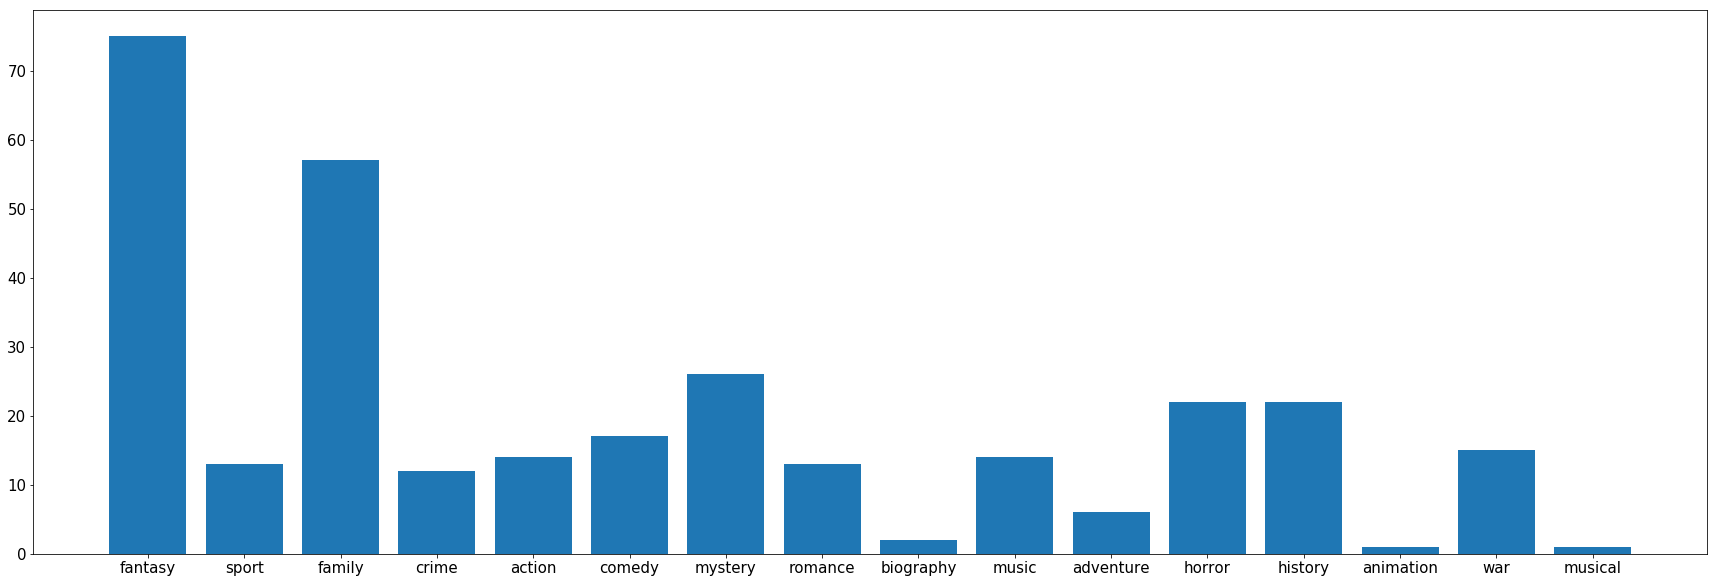

In [25]:
%matplotlib inline

counter = Counter(dict3.values())
print(counter)
plt.rcParams.update({'font.size': 15})
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)

frequencies = list(counter.values())
names = list(counter.keys())
print (frequencies)
x_coordinates = np.arange(len(counter))
ax.bar(x_coordinates, frequencies, align='center')

ax.xaxis.set_major_locator(plt.FixedLocator(x_coordinates))
ax.xaxis.set_major_formatter(plt.FixedFormatter(names))
# plt.hist(freq.values())
plt.show()

# Now checking each dialogue with the genres of the movies

In [26]:
glist = mtm_df[mtm_df['Movie_Number'] == movie_check].Genres
m1_df = mcm_df.loc[mcm_df['Movie_Number'] == movie_check]

In [27]:
list2 = []
for j in glist:
    j=j.replace('[',"")
    j=j.replace(']',"")
    j=j.replace("'","")
    j=j.split(", ")
    for items in j:
        list2.append(str(items))
print(list2)

['drama', 'fantasy', 'horror', 'mystery', 'thriller']


In [28]:
# Dictionary for our genres
gdict = {}
for i in list2:
    try:
        gdict[i] = model[i]
    except:
        pass

In [29]:
new_df = pd.DataFrame(columns = ['Character_Id1', 'Character_Id2', 'Gender1', 
                                 'Gender2', 'List_of_Utterance', 'Movie_Number',
                                 'Movie_Title', 'Name1', 'Name2'])
new_df = new_df.append(mc1_df, ignore_index = True)
new_df.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,Character_Id1,Character_Id2,Gender1,Gender2,List_of_Utterance,Movie_Number,Movie_Title,Name1,Name2
0,u2460,u2461,NaN,NaN,"['L439462', 'L439463', 'L439464']",m158,NaN,NaN,NaN
1,u2460,u2461,NaN,NaN,"['L439511', 'L439512']",m158,NaN,NaN,NaN
2,u2460,u2461,NaN,NaN,"['L439530', 'L439531', 'L439532']",m158,NaN,NaN,NaN
3,u2460,u2461,NaN,NaN,"['L439541', 'L439542', 'L439543']",m158,NaN,NaN,NaN
4,u2460,u2461,NaN,NaN,"['L439546', 'L439547', 'L439548']",m158,NaN,NaN,NaN


In [30]:
for index, rows in new_df.iterrows():
    rows[2] = m1_df.loc[m1_df.Character_Id == rows[0], 'Gender'].iloc[0]
    rows[3] = m1_df.loc[m1_df.Character_Id == rows[1], 'Gender'].iloc[0]
    rows[6] = m1_df.loc[m1_df.Movie_Number == rows[5], 'Movie_Title'].iloc[0]
    rows[7] = m1_df.loc[m1_df.Character_Id == rows[0], 'Character_Name'].iloc[0]
    rows[8] = m1_df.loc[m1_df.Character_Id == rows[1], 'Character_Name'].iloc[0]

In [31]:
new_df.head()

,Character_Id1,Character_Id2,Gender1,Gender2,List_of_Utterance,Movie_Number,Movie_Title,Name1,Name2
0,u2460,u2461,f,m,"['L439462', 'L439463', 'L439464']",m158,pet sematary,ELLIE,JUD
1,u2460,u2461,f,m,"['L439511', 'L439512']",m158,pet sematary,ELLIE,JUD
2,u2460,u2461,f,m,"['L439530', 'L439531', 'L439532']",m158,pet sematary,ELLIE,JUD
3,u2460,u2461,f,m,"['L439541', 'L439542', 'L439543']",m158,pet sematary,ELLIE,JUD
4,u2460,u2461,f,m,"['L439546', 'L439547', 'L439548']",m158,pet sematary,ELLIE,JUD


In [32]:
mc1_df.shape

(112, 4)

In [33]:
tokenizer = RegexpTokenizer(r'\w+')

dict3 = {}
gender_dict = {}
index1 = 0

# For a single dialogue
for index, rows in new_df.iterrows():
    s = rows[4]
    l = s.split('\'')[1::2]
    for _ in l:
        print(_)
        index1 += 1 
        val2 = {}
        av = np.zeros(300)
        line = ml1_df.loc[ml1_df['Line_Id'] == _, 'Dialogue'].iloc[0]
        print(line)
        line = tokenizer.tokenize(line)
        line = [i.lower() for i in line]
        line = [w for w in line if not w in stop_words]
#         print(line)
        l1 = len(line)
        for tokens in line:
#             print(model[tokens])
            try:
                av += model[tokens]
            except:
                l1 -= 1
                pass
        av = av/l1
#         print(av)
        # Cosine similarities
        for key, vals in gdict.items():
            try:
                val2[key] = 1 - spatial.distance.cosine(av, vals)
            except:
                pass
        print(val2)
        m = max(val2, key = val2.get)
        print(m, val2[m])
        dict3[index1] = m
        gender_dict[index1] = {rows[2]: m}
print(index1)

L439462
Who might you be, little Miss?
{'drama': 0.13282206315112288, 'fantasy': 0.23282045016096908, 'horror': 0.11663842097580324, 'mystery': 0.1812417346440569, 'thriller': 0.0710317985956136}
fantasy 0.23282045016096908
L439463
I'm Ellen Creed and I live at 642 Alden Lane, Dearborn, Michigan.  At least, I used to.
{'drama': 0.04508362158259882, 'fantasy': 0.18251198548011982, 'horror': 0.1320037172286228, 'mystery': 0.10016556410635391, 'thriller': 0.02675365858602663}
fantasy 0.18251198548011982
L439464
And now you live on Route 9 in Ludlow, and your dad's gonna be the new doctor up to the college, I hear, and I think you're going to be just as happy as a clam here, Ellen Creed.
{'drama': 0.1726340236132976, 'fantasy': 0.2432506243053968, 'horror': 0.19475545634158165, 'mystery': 0.18374538249887085, 'thriller': 0.08495512427145924}
fantasy 0.2432506243053968
L439511
But where are we going, Mr. Crandall?
{'drama': 0.0031076534546732315, 'fantasy': 0.11559535692419587, 'horror': 0.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning:

invalid value encountered in true_divide




L439631
Church? Oh. Oh, Jesus.
{'drama': 0.07554334862928735, 'fantasy': 0.16224413330134158, 'horror': 0.18083463744191985, 'mystery': 0.1150496468269786, 'thriller': 0.04809781645536837}
horror 0.18083463744191985
L439632
It's Church.
{'drama': 0.08334722386352034, 'fantasy': 0.026452956410255024, 'horror': 0.10965501290781421, 'mystery': 0.10727329187843215, 'thriller': -0.0024164498121357347}
horror 0.10965501290781421
L439633
I'm sorry. At least it don't look like he suffered.
{'drama': 0.07855404024548351, 'fantasy': 0.19506444553620217, 'horror': 0.24707764311208602, 'mystery': 0.10920706261497093, 'thriller': 0.044415347728274934}
horror 0.24707764311208602
L439634
Ellie will, though. She'll suffer plenty.
{'drama': 0.14933605053127996, 'fantasy': 0.23253269509131835, 'horror': 0.21067798068998056, 'mystery': 0.1523968459463273, 'thriller': 0.12413523971805751}
fantasy 0.23253269509131835
L439635
Loved that cat pretty well, didn't she?
{'drama': 0.11458519154725455, 'fantasy':

{'drama': 0.11964934999805854, 'fantasy': 0.22905554718953414, 'horror': 0.1544341803397664, 'mystery': 0.20032167531314748, 'thriller': 0.09411606171576858}
fantasy 0.22905554718953414
L439585
Thank you, Louis.
{'drama': -0.03943181383879346, 'fantasy': -0.006206473920839395, 'horror': -0.02260996155849293, 'mystery': 0.024840227353623234, 'thriller': -0.11740685664729766}
mystery 0.024840227353623234
L439586
Oh, you're welcome. Only if some- thing should go wrong while he's under the gas--it's a one-in-a-thousand shot, but it happens--you explain to her.
{'drama': 0.13535123179617448, 'fantasy': 0.1908807925413789, 'horror': 0.20754650024525745, 'mystery': 0.24136329075848817, 'thriller': 0.10502464799714206}
mystery 0.24136329075848817
L439625
Getting there.
{'drama': 0.06957405785897319, 'fantasy': 0.13862674005506348, 'horror': 0.0479004981264024, 'mystery': 0.06483055445186059, 'thriller': 0.052086305363492236}
fantasy 0.13862674005506348
L439626
I got eggs down here!
{'drama': 0

In [34]:
g_listm = []
genre_listm = []
g_listf = []
genre_listf = []
print(gender_dict)
for key, vals in gender_dict.items():
    gender = str(list(gender_dict.get(key, {}).keys())).replace('[','').replace(']', '').replace('\'', '')
    genre = str(list(gender_dict.get(key, {}).values())).replace('[','').replace(']', '').replace('\'', '')
    if gender == 'm' or gender == 'M':
        g_listm.append(gender)
        genre_listm.append(genre)
    else:
        g_listf.append(gender)
        genre_listf.append(genre)

{1: {'f': 'fantasy'}, 2: {'f': 'fantasy'}, 3: {'f': 'fantasy'}, 4: {'f': 'fantasy'}, 5: {'f': 'mystery'}, 6: {'f': 'fantasy'}, 7: {'f': 'horror'}, 8: {'f': 'drama'}, 9: {'f': 'mystery'}, 10: {'f': 'fantasy'}, 11: {'f': 'horror'}, 12: {'f': 'horror'}, 13: {'f': 'mystery'}, 14: {'f': 'fantasy'}, 15: {'f': 'mystery'}, 16: {'f': 'fantasy'}, 17: {'f': 'fantasy'}, 18: {'f': 'fantasy'}, 19: {'f': 'fantasy'}, 20: {'f': 'fantasy'}, 21: {'f': 'fantasy'}, 22: {'f': 'drama'}, 23: {'f': 'mystery'}, 24: {'f': 'mystery'}, 25: {'f': 'fantasy'}, 26: {'f': 'horror'}, 27: {'f': 'mystery'}, 28: {'f': 'fantasy'}, 29: {'f': 'horror'}, 30: {'f': 'fantasy'}, 31: {'f': 'horror'}, 32: {'f': 'mystery'}, 33: {'f': 'fantasy'}, 34: {'f': 'fantasy'}, 35: {'f': 'drama'}, 36: {'f': 'mystery'}, 37: {'f': 'horror'}, 38: {'f': 'fantasy'}, 39: {'f': 'drama'}, 40: {'f': 'drama'}, 41: {'f': 'fantasy'}, 42: {'f': 'fantasy'}, 43: {'f': 'drama'}, 44: {'f': 'horror'}, 45: {'f': 'fantasy'}, 46: {'f': 'fantasy'}, 47: {'f': 'fanta

In [35]:
print(g_listf, genre_listf)

['f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f'] ['fantasy', 'fantasy', 'fantasy', 'fantasy', 'mystery', 'fantasy', 'horror', 'drama', 'mystery', 'fantasy', 'horror', 'horror', 'mystery', 'fantasy', 'mystery', 'fantasy', 'fantasy', 'fantasy', 'fantasy', 'fantasy', 'fantasy', 'drama', 'mystery', 'mystery', 'fantasy', 'horror', 'mystery', 'fantasy', 'horror', 'fantasy', 'horror', 'mystery', 'fantasy', 'fantasy', 'drama', 'mystery', 'horror', 'fantasy', 'drama', 'drama', 'fantasy', 'fantasy', 'drama', 'horror', 'fantasy', 'fantasy', 'fantasy', '

In [36]:
# Visualization on the year of realese to get the idea of movie years we are working with
trace1 = go.Histogram(
    x=genre_listm,
    name='Male',
    marker=dict(
        color='#FFD7E9',
    ),
    opacity=0.75
)
trace2 = go.Histogram(
    x=genre_listf,
    name='Female',
    marker=dict(
        color='#EB89B5'
    ),
    opacity=0.75
)
data = [trace1, trace2]
layout = go.Layout(
    title='Genre_per_Gender',
    xaxis=dict(
        title='Count'
    ),
    yaxis=dict(
        title='Genres'
    ),
    bargap=0.2
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='GpG')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# Getting the Bechdel approved movie set

In [37]:
ba = pd.read_csv('Bechdel_Approved.csv')
ba = ba.rename(columns = {'title': 'Movie_Name'})
ba['Movie_Name'] = ba['Movie_Name'].str.lower()

In [38]:
ba.head()

,rating,Movie_Name,year,id,imdbid
0,0,roundhay garden scene,1888,8040,392728.0
1,0,pauvre pierrot,1892,5433,3.0
2,0,"execution of mary, queen of scots, the",1895,6200,132134.0
3,0,tables turned on the gardener,1895,5444,14.0
4,0,"arrival of a train, the",1896,6199,12.0


In [39]:
ba.rating.describe()

count    7871.000000
mean        2.154364
std         1.087029
min         0.000000
25%         1.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: rating, dtype: float64

In [40]:
ba_3 = ba[ba.rating == 3]
ba_2 = ba[ba.rating == 2]
ba_1 = ba[ba.rating == 1]
ba_0 = ba[ba.rating == 0]

In [41]:
print(ba_0.shape, ba_1.shape, ba_2.shape, ba_3.shape)

(803, 5) (1727, 5) (793, 5) (4548, 5)


In [42]:
ba_mtm_df = pd.merge(mtm_df, ba, on='Movie_Name')

In [43]:
ba_mtm_df.shape

(353, 10)

In [44]:
ba_mtm_df.head()

,Movie_Number,Movie_Name,Year_of_Release,IMDB_Rating,Number_of_Votes,Genres,rating,year,id,imdbid
0,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",3,1999,374,147800.0
1,m3,2001: a space odyssey,1968,8.4,163227,"['adventure', 'mystery', 'sci-fi']",0,1968,919,62622.0
2,m4,48 hrs.,1982,6.9,22289,"['action', 'comedy', 'crime', 'drama', 'thrill...",2,1982,5355,83511.0
3,m6,8mm,1999,6.3,48212,"['crime', 'mystery', 'thriller']",1,1999,146,134273.0
4,m7,a nightmare on elm street 4: the dream master,1988,5.2,13590,"['fantasy', 'horror', 'thriller']",3,1988,6020,95742.0


In [45]:
ba_mtm_df.to_csv('ba_mtm_csv.csv', index = False)

## 